## **pycls** 

[`git`](https://github.com/facebookresearch/pycls)

```
Our goal is to design better networks for visual recognition. 
Rather than designing or searching for a single best model 
under specific settings, we study the behavior of populations 
of models.
```

#### **Library**

Можем использовать как библиотеку - установить через `pip` и загрузить pre-trained модели для инференса или для изучения их структуры.

##### **Install**

In [ ]:
%%bash

pip install pycls
git clone https://github.com/facebookresearch/pycls


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 130 kB 31.9 MB/s 


##### **Usage**

[Табличка](https://github.com/facebookresearch/pycls/blob/main/MODEL_ZOO.md) с pre-trained моделями. 

Шаги в дизайне пространства:

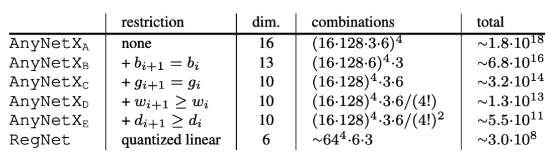

Так мы получаем модель RegNetX.

Общий архитектура рассматриваемых сетей:

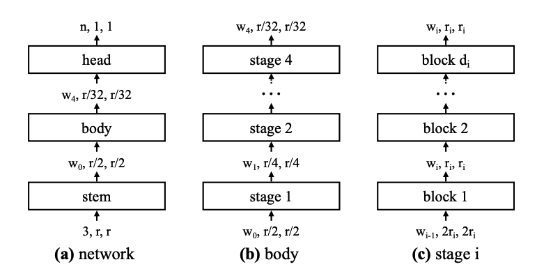

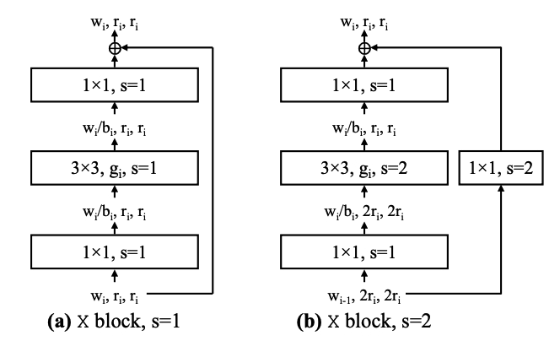

In [ ]:
import numpy as np

import pycls.models as pymodels 


In [ ]:
model = pymodels.regnetx("200MF", pretrained=True)

  [============================================================] 100.0% of 0.0MB file  



In [ ]:
model

RegNet(
  (stem): SimpleStemIN(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (s1): AnyStage(
    (b1): ResBottleneckBlock(
      (proj): Conv2d(32, 24, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (f): BottleneckTransform(
        (a): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (a_bn): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (a_relu): ReLU(inplace=True)
        (b): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=3, bias=False)
        (b_bn): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (b_relu): ReLU(inplace=True)
        (c): Conv2d(24, 24, kernel_size=(1, 1), stride=(1, 1), b

In [3]:
import yaml

fname = (
    "/content/"
    "pycls/configs/dds_baselines/regnetx/RegNetX-200MF_dds_8gpu.yaml"
)
stream = open(fname, 'r')
data = yaml.load(stream, Loader=yaml.FullLoader)
data

{'MODEL': {'TYPE': 'regnet', 'NUM_CLASSES': 1000},
 'REGNET': {'DEPTH': 13, 'W0': 24, 'WA': 36.44, 'WM': 2.49, 'GROUP_W': 8},
 'OPTIM': {'LR_POLICY': 'cos',
  'BASE_LR': 0.8,
  'MAX_EPOCH': 100,
  'MOMENTUM': 0.9,
  'WEIGHT_DECAY': '5e-5',
  'WARMUP_EPOCHS': 5},
 'TRAIN': {'DATASET': 'imagenet', 'IM_SIZE': 224, 'BATCH_SIZE': 1024},
 'TEST': {'DATASET': 'imagenet', 'IM_SIZE': 256, 'BATCH_SIZE': 800},
 'NUM_GPUS': 8,
 'OUT_DIR': '.'}

In [ ]:
quit()

#### **Framework**

Можем использовать как фреймфорк, то есть загрузить репозиторий, поставить его и учить семейства моделей самостоятельно через API. 

##### **Install**

In [2]:
%%bash

git clone https://github.com/facebookresearch/pycls
cd pycls && \
  pip install -r requirements.txt && \
  chmod 744 ./tools/*.py && \
  python setup.py develop --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached black-19.3b0-py36-none-any.whl (89 kB)
  Using cached isort-4.3.21-py2.py3-none-any.whl (42 kB)
  Using cached iopath-0.1.10.tar.gz (42 kB)
  Using cached fairscale-0.4.6.tar.gz (248 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31549 sha256=b8f91f73c4f1608300d0ca8f2e7d658c503c46969a41f28667d0366fe35ca1f5
  Stored in directory: /root/.cache/pip/wheels/aa/cc/ed/ca4e88beef656b01c84b9185196513ef2faf74a5a379b043a7
  Created wheel for fai

fatal: destination path 'pycls' already exists and is not an empty directory.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.4.1 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 4.2.0 which is incompatible.
gym 0.25.2 requires importlib-metadata>=4.8.0; python_version < "3.10", but you have importlib-metadata 4.2.0 which is incompatible.


##### **Data preparation**

cifar-10

In [ ]:
import torch, torchvision

_ = torchvision.datasets.CIFAR10(root='/content/cifar10', train=True, download=True)
_ = torchvision.datasets.CIFAR10(root='/content/cifar10', train=False, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/cifar10/cifar-10-python.tar.gz to /content/cifar10
Files already downloaded and verified


In [ ]:
%%bash

CUR_PATH=$(pwd)
mkdir -p $CUR_PATH/pycls/pycls/datasets/data
ln -sv /content/cifar10 $CUR_PATH/pycls/pycls/datasets/data/cifar10


'/content/pycls/pycls/datasets/data/cifar10' -> '/content/cifar10'


val part imagenet-1k

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
%%bash

mkdir -p /content/drive/MyDrive/imagenet/val
tar -C /content/drive/MyDrive/imagenet/val -xvf /content/drive/MyDrive/imagenet/var_images.tar

mkdir -p /content/pycls/pycls/datasets/data/imagenet
ln -sv /content/drive/MyDrive/imagenet /content/pycls/pycls/datasets/data/imagenet

mv /content/pycls/pycls/datasets/data/imagenet/imagenet/val /content/pycls/pycls/datasets/data/imagenet/val


##### **Usage**


**Model Info**

возьмем наименее затратную для обучения по времени модель и посмотрим ее архитектуру

In [ ]:
%%bash 

cd /content/pycls/ && \
  tools/run_net.py --mode info \
    --cfg configs/dds_baselines/regnetx/RegNetX-200MF_dds_8gpu.yaml

RegNet(
  (stem): SimpleStem(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (af): ReLU(inplace=True)
  )
  (s1): AnyStage(
    (b1): ResBottleneckBlock(
      (proj): Conv2d(32, 24, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (bn): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (f): BottleneckTransform(
        (a): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (a_bn): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (a_af): ReLU(inplace=True)
        (b): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=3, bias=False)
        (b_bn): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (b_af): ReLU(inplace=True)
        (c): Conv2d(24, 24, kernel_size=(1, 1), stride=(1, 1), bias=Fals

**Model evaluation**

In [ ]:
%%bash 

cd /content/pycls/ && \
    cp configs/dds_baselines/regnetx/RegNetX-200MF_dds_8gpu.yaml \
       configs/dds_baselines/regnetx/RegNetX-200MF_dds_1gpu.yaml

In [ ]:
!cat /content/pycls/configs/dds_baselines/regnetx/RegNetX-200MF_dds_1gpu.yaml

MODEL:
  TYPE: regnet
  NUM_CLASSES: 1000
REGNET:
  DEPTH: 13
  W0: 24
  WA: 36.44
  WM: 2.49
  GROUP_W: 8
OPTIM:
  LR_POLICY: cos
  BASE_LR: 0.8
  MAX_EPOCH: 100
  MOMENTUM: 0.9
  WEIGHT_DECAY: 5e-5
  WARMUP_EPOCHS: 5
TRAIN:
  DATASET: imagenet
  IM_SIZE: 224
  BATCH_SIZE: 1024
TEST:
  DATASET: imagenet
  IM_SIZE: 256
  BATCH_SIZE: 800
NUM_GPUS: 8
OUT_DIR: .


In [ ]:
import yaml

fname = (
    "/content/"
    "pycls/configs/dds_baselines/regnetx/RegNetX-200MF_dds_1gpu.yaml"
)
stream = open(fname, 'r')
data = yaml.load(stream, Loader=yaml.FullLoader)

data['MODEL']['NUM_CLASSES'] = 10
data['TRAIN']['DATASET'] = "cifar10"
data['TRAIN']['BATCH_SIZE'] = 16
data['TEST']['DATASET'] = "cifar10"
data['TEST']['BATCH_SIZE'] = 16
data['TRAIN']['IM_SIZE'] = 32
data['NUM_GPUS'] = 1

with open(fname, 'w') as yaml_file:
    yaml_file.write(yaml.dump(data, default_flow_style=False))


In [ ]:
!cat /content/pycls/configs/dds_baselines/regnetx/RegNetX-200MF_dds_1gpu.yaml

MODEL:
  NUM_CLASSES: 10
  TYPE: regnet
NUM_GPUS: 1
OPTIM:
  BASE_LR: 0.8
  LR_POLICY: cos
  MAX_EPOCH: 100
  MOMENTUM: 0.9
  WARMUP_EPOCHS: 5
  WEIGHT_DECAY: 5e-5
OUT_DIR: .
REGNET:
  DEPTH: 13
  GROUP_W: 8
  W0: 24
  WA: 36.44
  WM: 2.49
TEST:
  BATCH_SIZE: 16
  DATASET: cifar10
  IM_SIZE: 32
TRAIN:
  BATCH_SIZE: 16
  DATASET: cifar10
  IM_SIZE: 32


In [ ]:
%%bash 

/content/pycls/tools/run_net.py --mode train \
    --cfg /content/pycls/configs/dds_baselines/regnetx/RegNetX-200MF_dds_1gpu.yaml \
    TEST.WEIGHTS https://dl.fbaipublicfiles.com/pycls/dds_baselines/160905981/RegNetX-200MF_dds_8gpu.pyth \
    OUT_DIR /tmp


Process is terminated.


Модели можно дообучать или учить с нуля. Результаты будут доступны в [виде](https://dl.fbaipublicfiles.com/pycls/sweeps/cifar/cifar_optim_analysis.html).